In [9]:
# Importar librerías que se van a ocupar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from rich import print # Librería para cambiar los colores en la consola de depuración

In [10]:
# Listado de estilos diponibles para la versión actual de Seaborn
print(sns.axes_style())

{
    'axes.facecolor': 'white',
    'axes.edgecolor': '.8',
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.labelcolor': '.15',
    'figure.facecolor': 'white',
    'grid.color': '.8',
    'grid.linestyle': '-',
    'text.color': '.15',
    'xtick.color': '.15',
    'ytick.color': '.15',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'lines.solid_capstyle': <CapStyle.round: 'round'>,
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'image.cmap': 'rocket',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'xtick.bottom': False,
    'xtick.top': False,
    'ytick.left': False,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True
}

In [11]:
# Configuraciones de estilo para las gráficas
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Cargar datos

In [12]:
# Cargar dataset
df = pd.read_csv('consolidado_final.csv', parse_dates=['DATE'])

In [13]:
# Revisión general del dataset
print("Información del DataFrame:")
print(df.info())
print("\nPrimeros registros:")
print(df.head())

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   WEEK                         122002 non-null  object        
 1   ITEM_CODE                    122002 non-null  object        
 2   TOTAL_UNIT_SALES             122002 non-null  float64       
 3   TOTAL_VALUE_SALES            122002 non-null  float64       
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64       
 5   REGION                       122002 non-null  object        
 6   MANUFACTURER                 122002 non-null  object        
 7   BRAND                        122002 non-null  object        
 8   ITEM                         122002 non-null  object        
 9   ITEM_DESCRIPTION             122002 non-null  object        
 10  CATEGORY                     122002 non-null  int64         
 11  FORMAT                    

None

Primeros registros:

WEEK         ITEM_CODE  TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
0  34-22  7501058792808BP2             0.006              0.139   
1  34-22     7501058715883             0.487            116.519   
2  34-22     7702626213774             1.391             68.453   
3  34-22     7501058716422             0.022              1.481   
4  34-22     7501058784353             2.037            182.839   

   TOTAL_UNIT_AVG_WEEKLY_SALES              REGION MANUFACTURER   BRAND  \
0                        1.000  TOTAL AUTOS AREA 5      RECKITT  VANISH   
1                        2.916  TOTAL AUTOS AREA 5      RECKITT  VANISH   
2                        5.171  TOTAL AUTOS AREA 5      RECKITT  VANISH   
3                        1.833  TOTAL AUTOS AREA 5      RECKITT  VANISH   
4                        5.375  TOTAL AUTOS AREA 5      RECKITT  VANISH   

               ITEM                                   ITEM_DESCRIPTION  ...  \
0  7501058792808BP2  VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...  ...   
1     7501058715883  VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...  ...   
2     7702626213774  VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...  ...   
3     7501058716422  VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...  ...   
4     7501058784353  VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...  ...   

              ATTR2 ATTR3 ID_CATEGORY SEGMENT  YEAR  MONTH WEEK_NUMBER  \
0  FABRIC TREATMENT  ROSA         NaN  POWDER  2022      8          34   
1  FABRIC TREATMENT  ROSA         NaN  POWDER  2022      8          34   
2  FABRIC TREATMENT  ROSA         NaN  POWDER  2022      8          34   
3  FABRIC TREATMENT  ROSA         NaN  POWDER  2022      8          34   
4  FABRIC TREATMENT  ROSA         NaN  POWDER  2022      8          34   

        DATE  UNIT_PRICE  TOTAL_SALES  
0 2022-08-28   23.166667        0.139  
1 2022-08-28  239.258727      116.519  
2 2022-08-28   49.211359       68.453  
3 2022-08-28   67.318182        1.481  
4 2022-08-28   89.758959      182.839  

[5 rows x 23 columns]

# Distribución de ventas por segmento

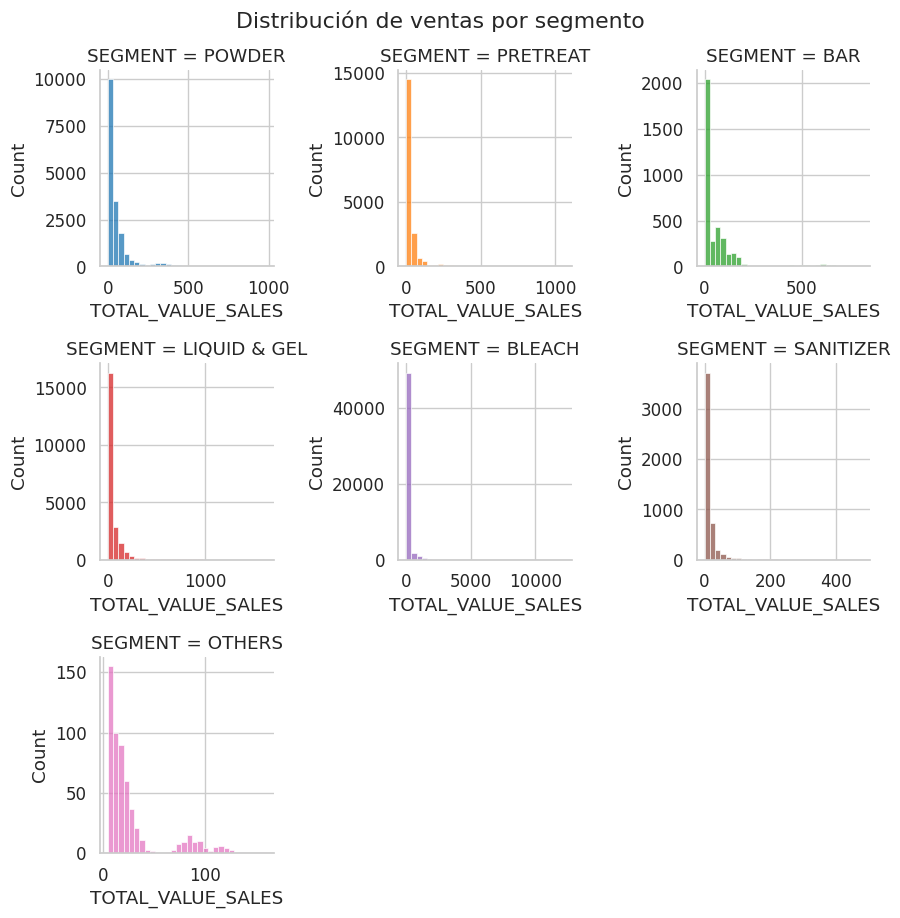

In [25]:
# Paleta de colores para los segmentos
palette = sns.color_palette("tab10", n_colors=df['SEGMENT'].nunique())

segment_colors = dict(zip(df['SEGMENT'].unique(), palette))

# Función para graficar con color según segmento
def colored_hist(data, color, **kwargs):
    segment = data['SEGMENT'].iloc[0]
    sns.histplot(data['TOTAL_VALUE_SALES'], bins=30, color=segment_colors[segment], **kwargs)

# Grafica con FacetGrid y con la función creada
g = sns.FacetGrid(df, col='SEGMENT', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(colored_hist)
g.fig.suptitle('Distribución de ventas por segmento', y=1.02)
plt.savefig('histogramas_ventas_segmento_colores.png')
plt.show()

# Tendencia de ventas con respecto al tiempo

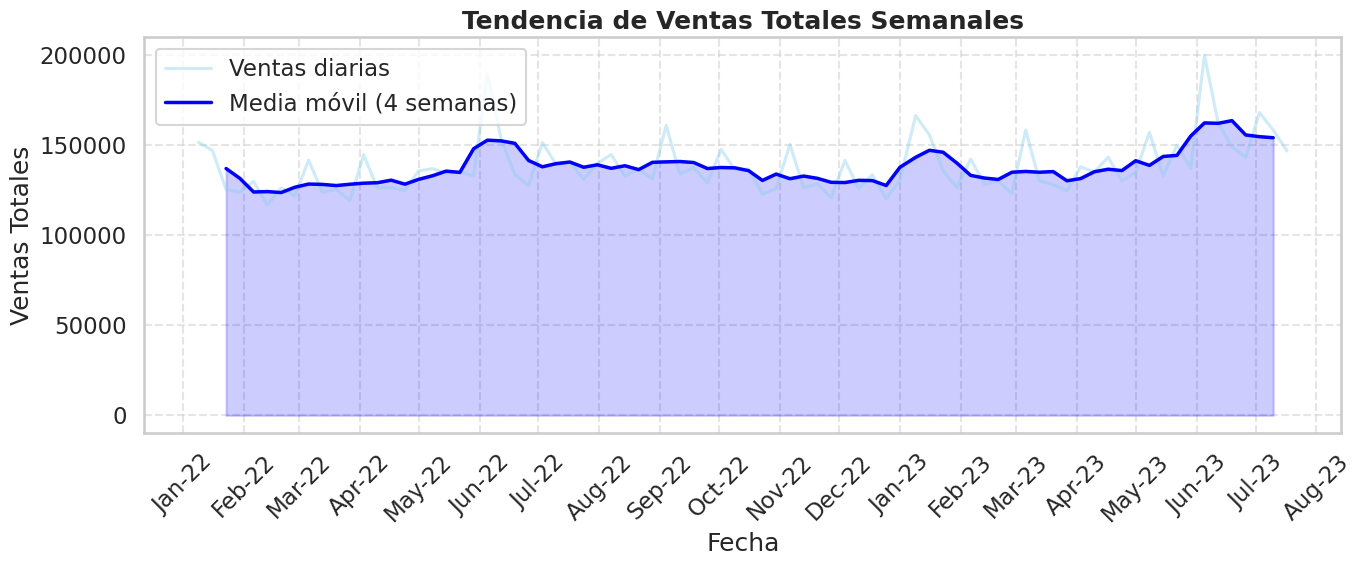

In [26]:
# Estilo de gráficas
sns.set(style="whitegrid", context='talk', palette="deep")

# Agregación por fecha
ventas_diarias = df.groupby('DATE')['TOTAL_SALES'].sum().reset_index()

# Suavizado con media móvil
ventas_diarias['rolling'] = ventas_diarias['TOTAL_SALES'].rolling(window=4, center=True).mean()

# Crear la figura
plt.figure(figsize=(14, 6))
plt.plot(ventas_diarias['DATE'], ventas_diarias['TOTAL_SALES'], color='skyblue', alpha=0.4, label='Ventas diarias')
plt.plot(ventas_diarias['DATE'], ventas_diarias['rolling'], color='blue', linewidth=2.5, label='Media móvil (4 semanas)')
plt.fill_between(ventas_diarias['DATE'], ventas_diarias['rolling'], color='blue', alpha=0.2)

# Mejora en los ejes y formato de fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

# Títulos y etiquetas
plt.title('Tendencia de Ventas Totales Semanales', fontsize=18, weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

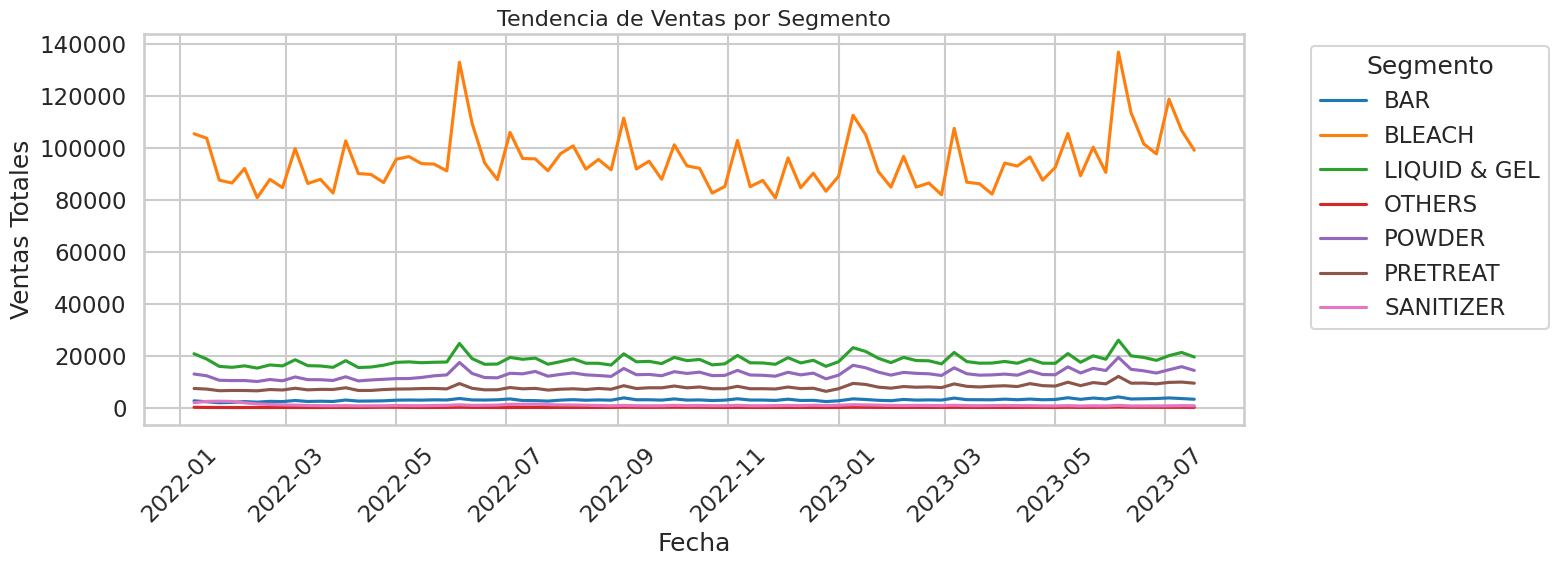

In [27]:
# Agrupar ventas por fecha y segmento
ventas_segmento = df.groupby(['DATE', 'SEGMENT'])['TOTAL_SALES'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=ventas_segmento, x='DATE', y='TOTAL_SALES', hue='SEGMENT', palette='tab10')
plt.title('Tendencia de Ventas por Segmento', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relación entre diferentes variables

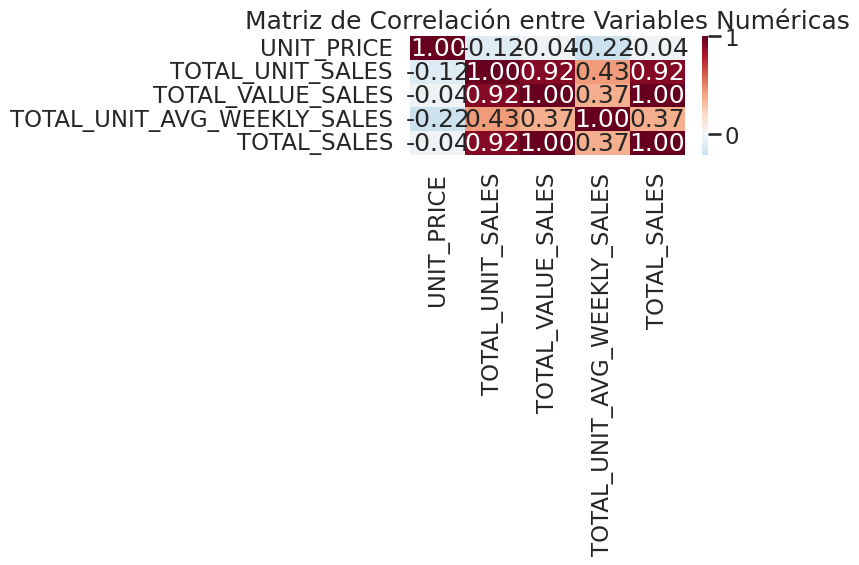

In [28]:
#Matriz de correlación para decidir qué relaciones valen la pena explorar visualmente

# Seleccionar las variables numéricas relevantes
numeric_vars = [
    "UNIT_PRICE",
    "TOTAL_UNIT_SALES",
    "TOTAL_VALUE_SALES",
    "TOTAL_UNIT_AVG_WEEKLY_SALES",
    "TOTAL_SALES"
]

# Calcular la matriz de correlación
corr_matrix = df[numeric_vars].corr()

# Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

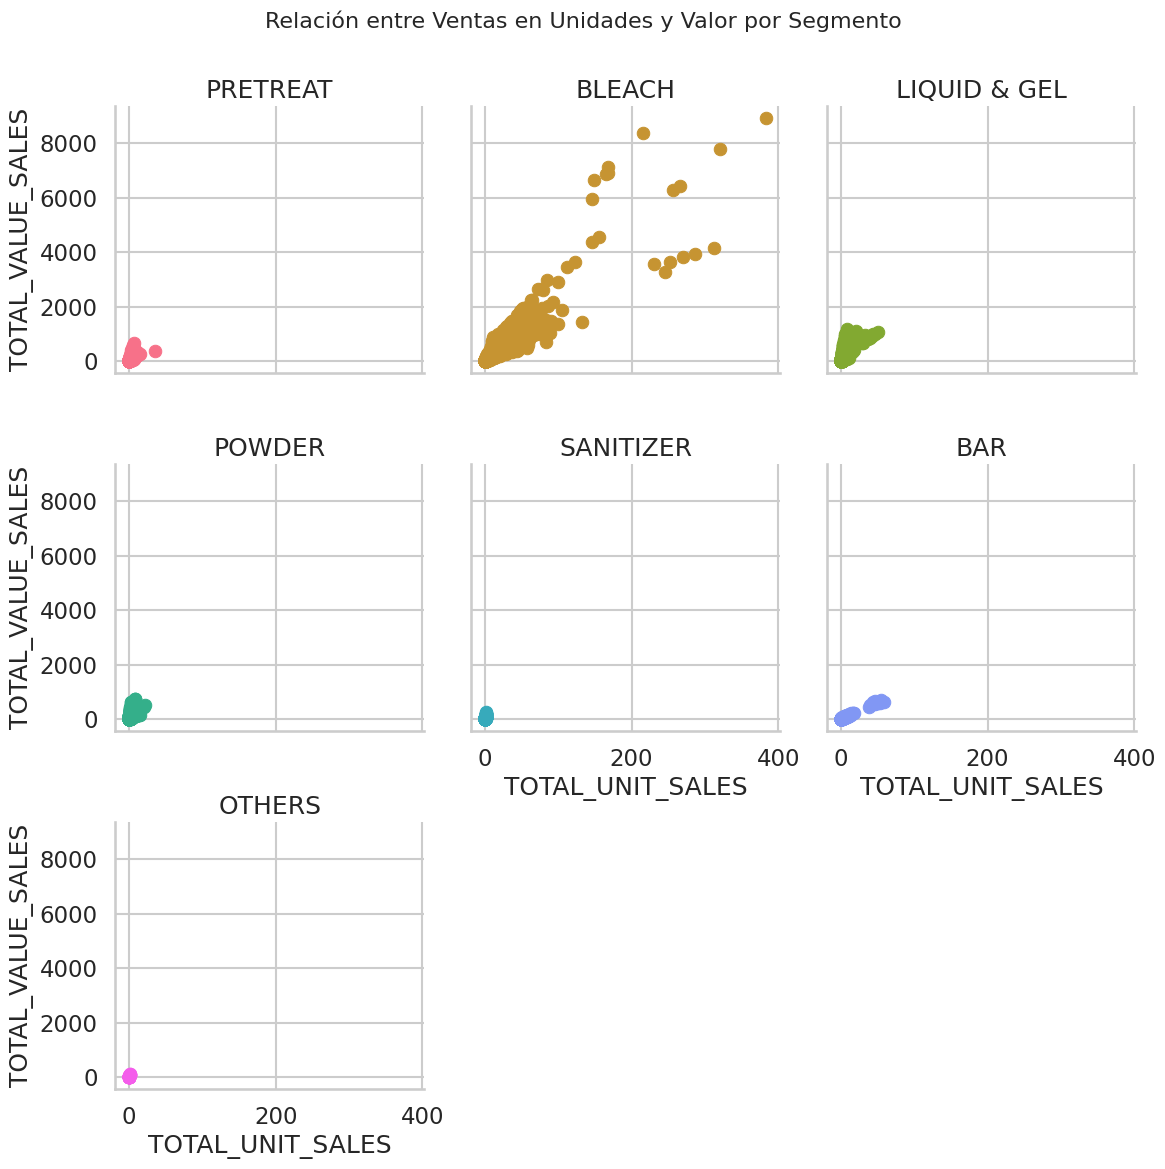

In [29]:
# Paleta personalizada para los segmentos
unique_segments = df["SEGMENT"].unique()
palette = sns.color_palette("husl", len(unique_segments))
segment_color_dict = dict(zip(unique_segments, palette))

# Gráfica con FacetGrid
g = sns.FacetGrid(df.sample(10000), col="SEGMENT", col_wrap=3, height=4)
g.map_dataframe(
    sns.scatterplot,
    x="TOTAL_UNIT_SALES",
    y="TOTAL_VALUE_SALES",
    color=None
)

# Asignar colores individualmente
for ax, segment in zip(g.axes.flat, unique_segments):
    ax.collections[0].set_color(segment_color_dict[segment])

g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relación entre Ventas en Unidades y Valor por Segmento", fontsize=16)
plt.show()

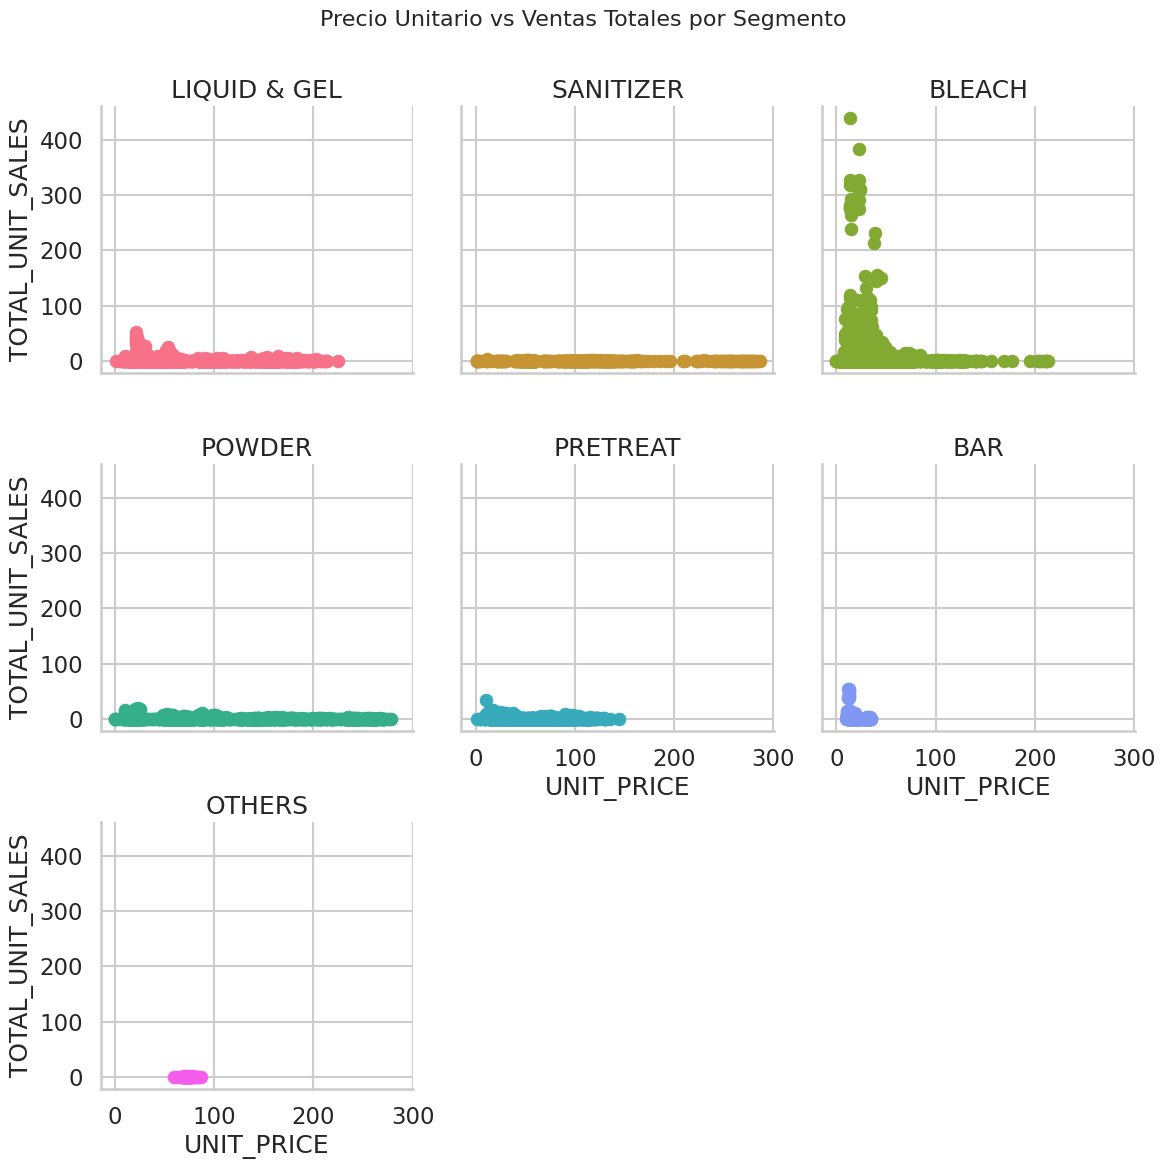

In [30]:
g = sns.FacetGrid(df.sample(10000), col="SEGMENT", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="UNIT_PRICE", y="TOTAL_UNIT_SALES", color=None)

# Aplicar colores por segmento
for ax, segment in zip(g.axes.flat, unique_segments):
    ax.collections[0].set_color(segment_color_dict[segment])

g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Precio Unitario vs Ventas Totales por Segmento", fontsize=16)
plt.show()

# Distribución geográfica de las ventas

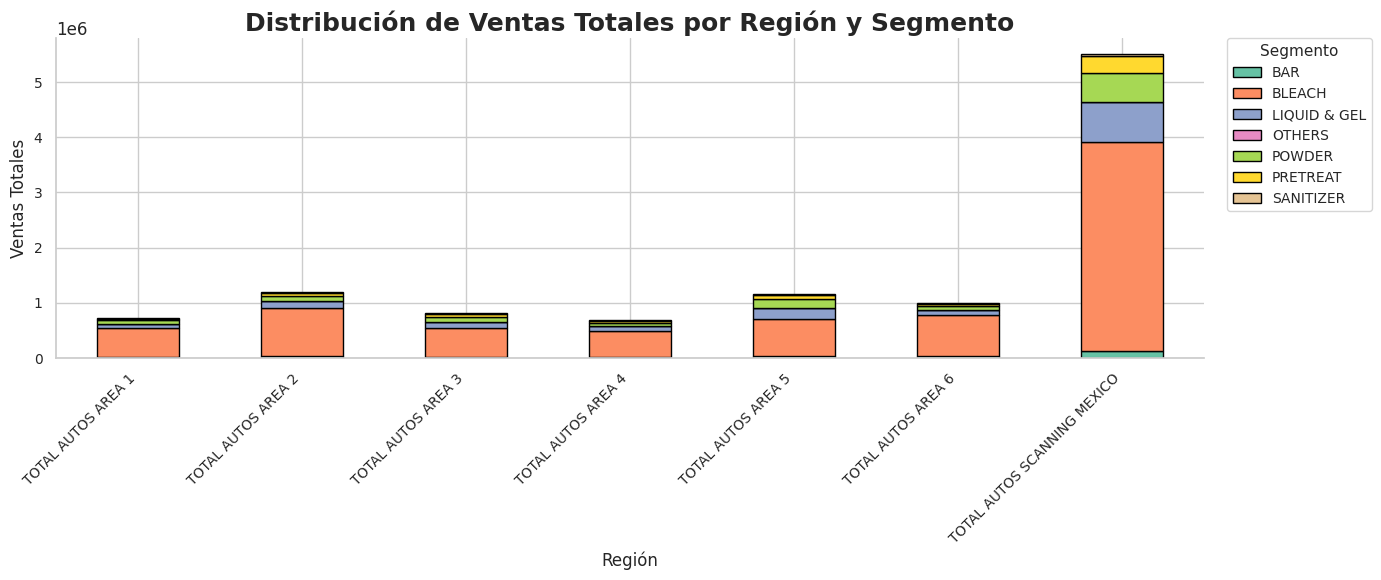

In [31]:
# Configuración de la gráfica
sns.set(style="whitegrid", font_scale=1.1)

# Grupos por región y segmento
region_segment_sales = df.groupby(['REGION', 'SEGMENT'])['TOTAL_SALES'].sum().unstack().fillna(0)

# Colores
colors = sns.color_palette("Set2", n_colors=region_segment_sales.shape[1])

# Gráfico de barras apiladas
ax = region_segment_sales.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    color=colors,
    edgecolor='black'
)

# Título y etiquetas
plt.title("Distribución de Ventas Totales por Región y Segmento", fontsize=18, fontweight='bold')
plt.ylabel("Ventas Totales", fontsize=12)
plt.xlabel("Región", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Leyenda
plt.legend(title='Segmento', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=10, title_fontsize=11)

# Elimina el marco superior y derecho
sns.despine()

# Ajuste de diseño
plt.tight_layout()
plt.show()


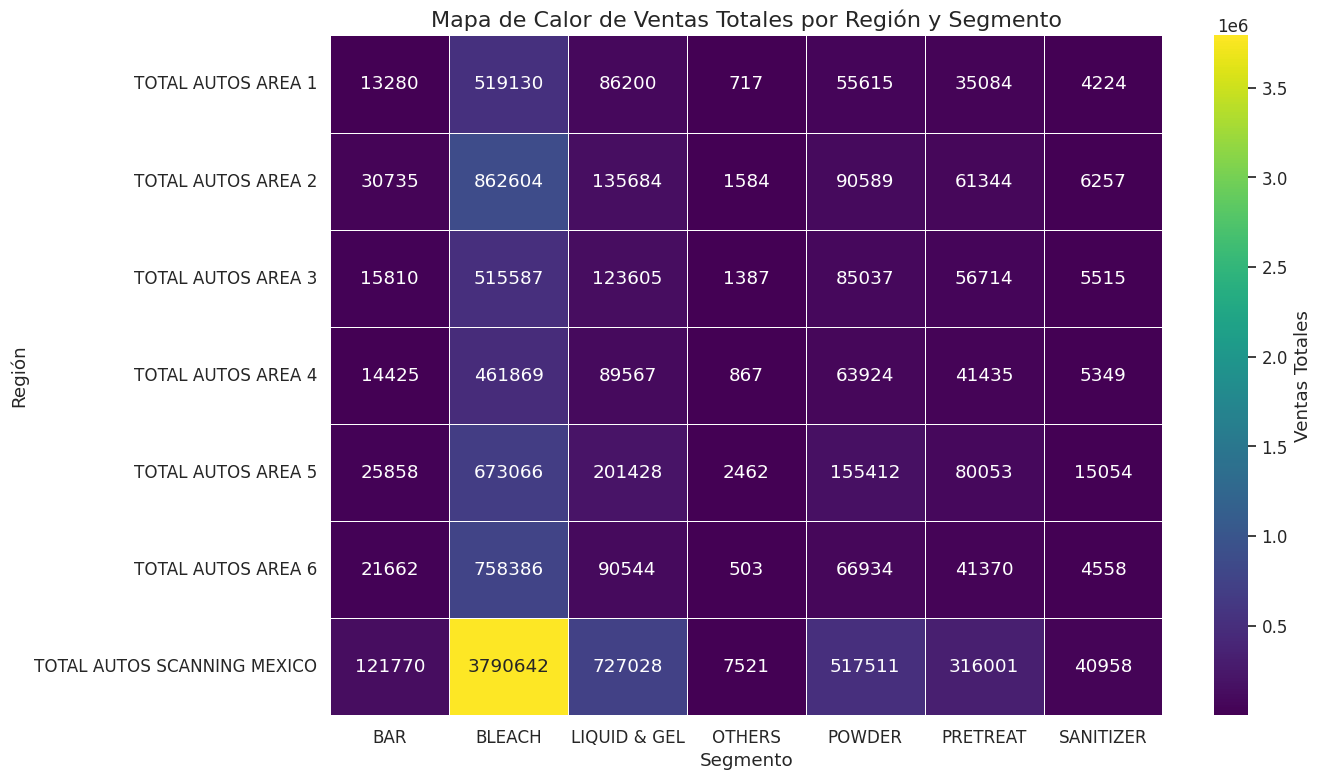

In [32]:
# Grupos por región y segmento
heat_data = df.groupby(['REGION', 'SEGMENT'])['TOTAL_SALES'].sum().unstack().fillna(0)

# Crear mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(heat_data, cmap='viridis', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Ventas Totales'})
plt.title("Mapa de Calor de Ventas Totales por Región y Segmento", fontsize=16)
plt.xlabel("Segmento")
plt.ylabel("Región")
plt.tight_layout()
plt.show()

# Outliers y anomalías
## El enfoque será a través de 3 rubros:
### Ventas por Marca
### Ventas por Categoría
### Ventas por Región

/tmp/ipython-input-2293433906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_brands, x='BRAND', y='TOTAL_SALES', palette=palette)


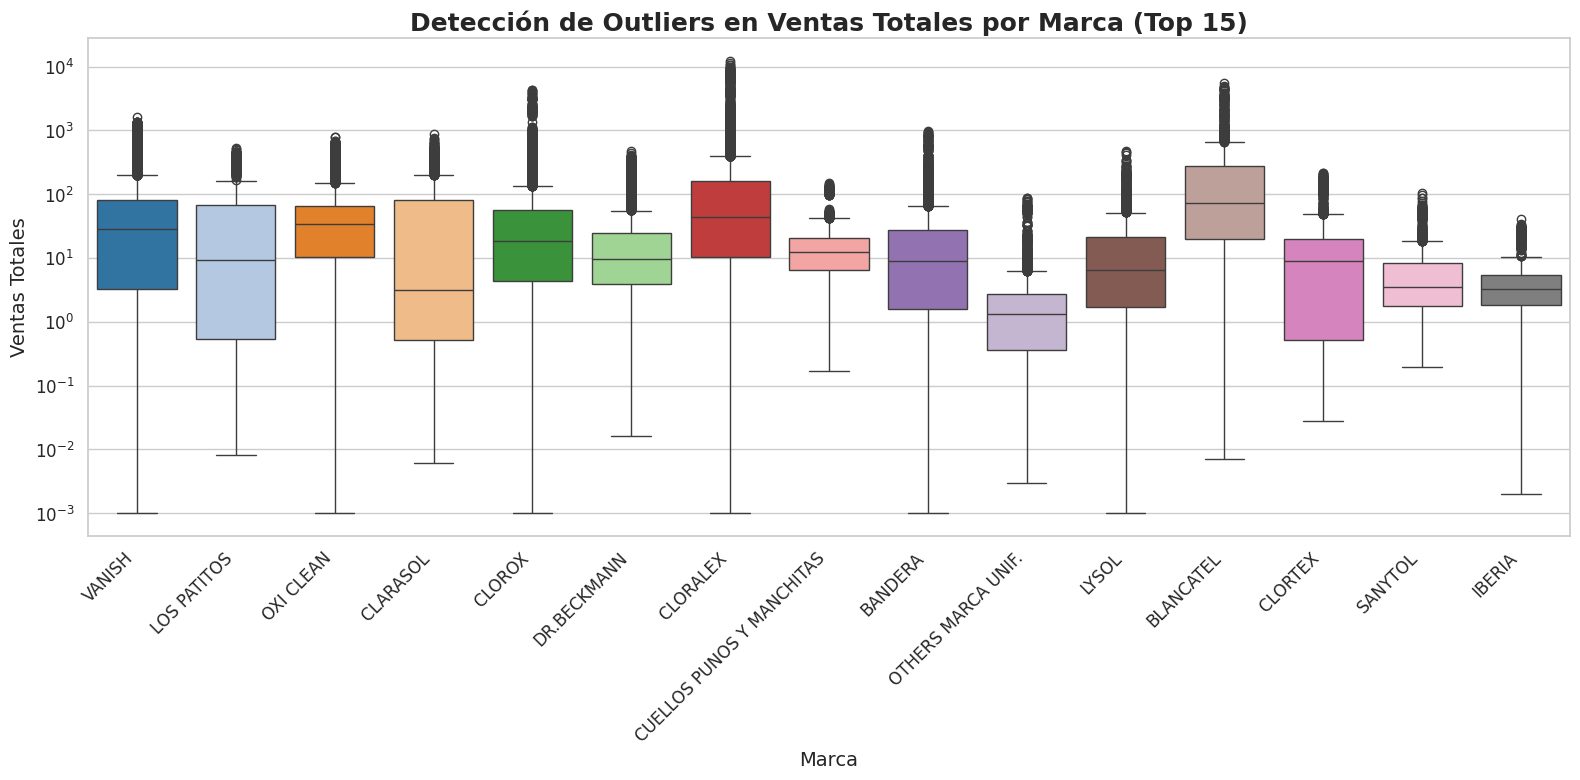

Resumen de Outliers por Marca (Top 15):

CLORTEX: 18.69% outliers (274 de 1466 registros)

CUELLOS PUNOS Y MANCHITAS: 16.14% outliers (142 de 880 registros)

BLANCATEL: 13.48% outliers (285 de 2115 registros)

LOS PATITOS: 13.40% outliers (323 de 2410 registros)

CLARASOL: 12.81% outliers (276 de 2154 registros)

CLORALEX: 12.30% outliers (2821 de 22933 registros)

SANYTOL: 11.67% outliers (196 de 1680 registros)

OTHERS MARCA UNIF.: 11.39% outliers (369 de 3240 registros)

IBERIA: 11.31% outliers (232 de 2052 registros)

CLOROX: 11.20% outliers (2212 de 19754 registros)

BANDERA: 10.79% outliers (1010 de 9361 registros)

DR.BECKMANN: 9.41% outliers (1076 de 11434 registros)

OXI CLEAN: 9.19% outliers (633 de 6889 registros)

LYSOL: 8.96% outliers (309 de 3449 registros)

VANISH: 8.82% outliers (2502 de 28377 registros)

In [33]:
# Ventas por Marca

# Se consideran las marcas con más datos para no saturar la gráfica (15 marcas por ventas)
top_brands = df.groupby('BRAND')['TOTAL_SALES'].sum().sort_values(ascending=False).head(15).index

# Se obtienen los datos de las marcas de productos
df_top_brands = df[df['BRAND'].isin(top_brands)]

# Gráfica
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
palette = sns.color_palette("tab20", len(top_brands))
sns.boxplot(data=df_top_brands, x='BRAND', y='TOTAL_SALES', palette=palette)
plt.title('Detección de Outliers en Ventas Totales por Marca (Top 15)', fontsize=18, fontweight='bold')
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Escala log para mejor visualización
plt.tight_layout()
plt.show()

# Cálculo de outliers para cada marca usando IQR
outliers_summary = []

for brand in top_brands:
    sales = df_top_brands[df_top_brands['BRAND'] == brand]['TOTAL_SALES']
    Q1 = sales.quantile(0.25)
    Q3 = sales.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = sales[(sales < lower_bound) | (sales > upper_bound)].count()
    total_records = sales.count()
    outliers_pct = (outliers_count / total_records) * 100

    outliers_summary.append({
        'BRAND': brand,
        'Total_Records': total_records,
        'Outliers_Count': outliers_count,
        'Outliers_Percentage': outliers_pct
    })

outliers_summary = pd.DataFrame(outliers_summary).sort_values(by='Outliers_Percentage', ascending=False)

# Resumen de outliers con colores
print("\n[bold underline]Resumen de Outliers por Marca (Top 15):[/bold underline]\n")
for _, row in outliers_summary.iterrows():
    brand = row['BRAND']
    pct = row['Outliers_Percentage']
    total = int(row['Total_Records'])
    outliers = int(row['Outliers_Count'])

    if pct >= 15:
        color = "bold red"
    elif pct >= 10:
        color = "yellow"
    elif pct >= 5:
        color = "green"
    else:
        color = "white"

    print(f"[{color}]{brand}[/]: {pct:.2f}% outliers ({outliers} de {total} registros)")


#### Los productos que presentan mayor variabilidad en las ventas (CLORTEX y CUELLOS PUNOS Y MANCHITAS) podrían representar un riesgo para la empresa, ya que no es posible predecir su demanda y esto podría afectar la planeación de inventarios, la producción y la logística, incrementando el riesgo de sobrestock o faltantes.

/tmp/ipython-input-2902965680.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_segments, y='SEGMENT', x='TOTAL_SALES', palette=palette, orient='h')


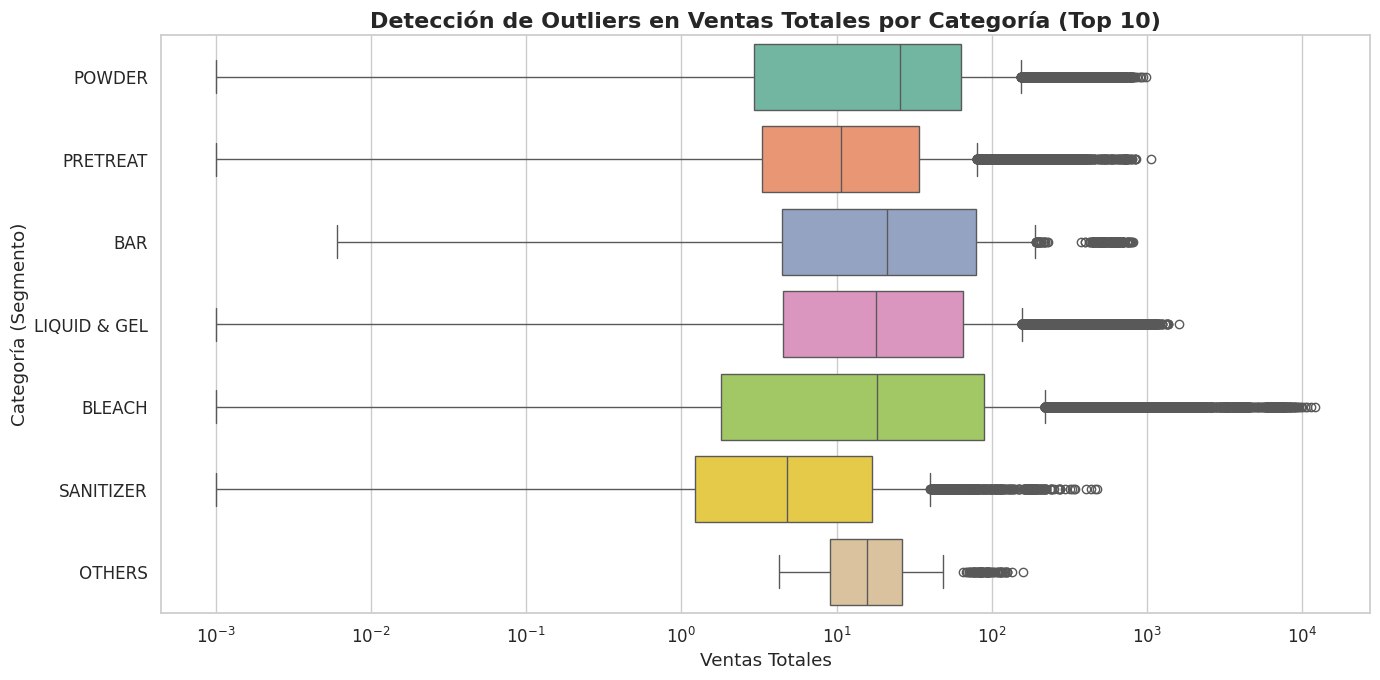

Resumen de Outliers por Categoría:

BLEACH: 12.43% outliers (6618 de 53246 registros)

LIQUID & GEL: 9.42% outliers (2138 de 22697 registros)

POWDER: 8.63% outliers (1527 de 17694 registros)

PRETREAT: 9.24% outliers (1768 de 19143 registros)

BAR: 5.19% outliers (189 de 3639 registros)

SANITIZER: 9.32% outliers (468 de 5023 registros)

OTHERS: 14.46% outliers (81 de 560 registros)

In [34]:
# Ventas por Categoría (Segmento)

# Top 10 categorías (segmentos) por ventas
top_segments = df.groupby('SEGMENT')['TOTAL_SALES'].sum().sort_values(ascending=False).head(10).index
df_top_segments = df[df['SEGMENT'].isin(top_segments)]

# Gráfica
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(top_segments))

sns.boxplot(data=df_top_segments, y='SEGMENT', x='TOTAL_SALES', palette=palette, orient='h')
plt.title('Detección de Outliers en Ventas Totales por Categoría (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría (Segmento)')
plt.xscale('log')  # Escala log para mejor visualización
plt.tight_layout()
plt.show()

# Detección de outliers por Categoría
print("\n[bold underline]Resumen de Outliers por Categoría:[/bold underline]")
outlier_summary = []

for segment in top_segments:
    subset = df_top_segments[df_top_segments['SEGMENT'] == segment]['TOTAL_SALES']
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    total = subset.count()
    outliers_count = outliers.count()
    outlier_percentage = (outliers_count / total) * 100

    outlier_summary.append({
        'Segment': segment,
        'Total_Records': total,
        'Outliers_Count': outliers_count,
        'Outliers_Percentage': outlier_percentage
    })

    # Mostrar en consola con colores
    if outlier_percentage > 15:
        print(f"[red]{segment}: {outlier_percentage:.2f}% outliers ({outliers_count} de {total} registros)[/red]")
    elif outlier_percentage > 10:
        print(f"[yellow]{segment}: {outlier_percentage:.2f}% outliers ({outliers_count} de {total} registros)[/yellow]")
    else:
        print(f"[green]{segment}: {outlier_percentage:.2f}% outliers ({outliers_count} de {total} registros)[/green]")

#### En las ventas por segmento, se observa que la mayoría de las categorías opera con estabilidad y sin fluctuaciones extremas que afecten la confiabilidad de los datos. Esto indica que no existen riesgos financieros inmediatos derivados de comportamientos irregulares o anomalías en la mayoría de los segmentos. Sin embargo, algunos segmentos como OTHERS presentan un porcentaje mayor de valores atípicos, lo que sugiere la necesidad de un monitoreo adicional para garantizar la calidad y precisión de la información en estos casos.

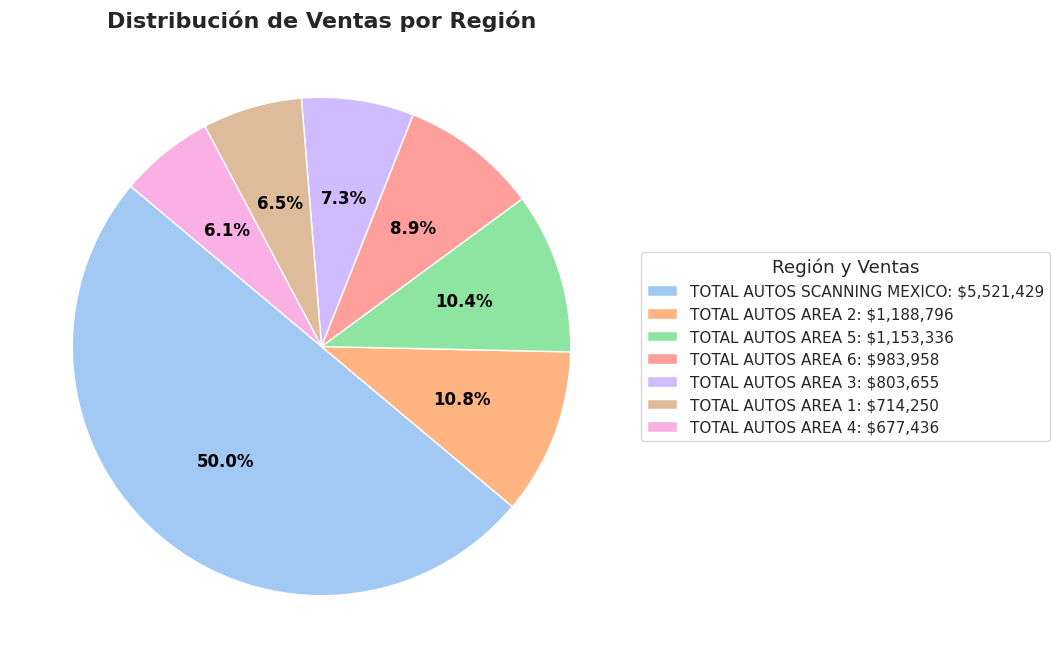

Resumen de Outliers por Región:

TOTAL AUTOS SCANNING MEXICO: 9.68% outliers (2031 de 20990 registros)

TOTAL AUTOS AREA 2: 9.29% outliers (1719 de 18505 registros)

TOTAL AUTOS AREA 5: 8.71% outliers (1406 de 16135 registros)

TOTAL AUTOS AREA 6: 10.16% outliers (1718 de 16913 registros)

TOTAL AUTOS AREA 3: 9.99% outliers (1648 de 16496 registros)

TOTAL AUTOS AREA 1: 7.80% outliers (1231 de 15781 registros)

TOTAL AUTOS AREA 4: 9.02% outliers (1549 de 17182 registros)

In [35]:
# Ventas por Región

region_sales = df.groupby('REGION')['TOTAL_SALES'].sum().sort_values(ascending=False)

# Datos para gráfica de pastel
labels = region_sales.index
sales_values = region_sales.values
percentages = 100 * sales_values / sales_values.sum()
colors = sns.color_palette("pastel")

# Etiquetas externas con nombre y ventas
external_labels = [f"{region}: ${sales:,.0f}" for region, sales in zip(labels, sales_values)]

# Gráfica de pastel
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sales_values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

# leyenda externa
plt.legend(wedges, external_labels, title="Región y Ventas", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)
plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribución de Ventas por Región", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Detección de outliers por región
print("\n[bold underline]Resumen de Outliers por Región:[/bold underline]")

summary = []

for region in labels:
    region_data = df[df['REGION'] == region]['TOTAL_SALES']
    q1 = region_data.quantile(0.25)
    q3 = region_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = region_data[(region_data < lower_bound) | (region_data > upper_bound)]
    total = len(region_data)
    outliers_count = len(outliers)
    percentage = (outliers_count / total) * 100 if total > 0 else 0

    # Clasificación por color
    if percentage > 15:
        color = "red"
    elif percentage > 10:
        color = "yellow"
    else:
        color = "green"

    print(f"[{color}]{region}: {percentage:.2f}% outliers ({outliers_count} de {total} registros)[/{color}]")

    summary.append({
        'REGION': region,
        'Total_Records': total,
        'Outliers_Count': outliers_count,
        'Outliers_Percentage': percentage
    })


####  El AREA 6 presenta el porcentaje más alto de outliers con 10.16%, lo que sugiere una variabilidad superior al promedio. Aunque no representa un riesgo crítico, es recomendable revisar los casos específicos para descartar errores operativos o identificar patrones de oportunidad. Las demás regiones se encuentran en niveles aceptables, lo cual indica un comportamiento de ventas relativamente estable y sin señales de alerta crítica.

# Resumen de los hallazgos obtenidos
#### Al revisar las ventas por marca, algunas tienen mucha venta pero también muestran altibajos grandes, lo que podría generar ciertos riesgos y merece atención. Por otro lado, las ventas por segmento son bastante estables, sin cambios bruscos, lo que da confianza en la información. En cuanto a las regiones, aunque las ventas varían, no se observan comportamientos extraños que preocupen. En general, la recomendación es estar pendientes de las marcas con mucha variabilidad, mientras que los segmentos y regiones parecen estar bajo control.